In [1]:
import os 
# Now run the prebaked systems example
os.chdir('c:\\Users\\Danie\\OneDrive\\Documents\\Coding\\pysystemtrade\\pysystemtrade\\examples\\introduction')

In [2]:
import sys
import os

# Add the parent directory of pysystemtrade to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

In [3]:
import logging

# Set logging level to INFO to suppress DEBUG messages
logging.getLogger().setLevel(logging.INFO)

# Import systemtest
from systems.systemtest import systemtest
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData

# Initialize the data
data = csvFuturesSimData()

# Create and run the system with JPY instrument
my_system = systemtest(data=data, instrument="JPY")
print(my_system.portfolio.get_notional_position("JPY").tail(5))


Configuring sim logging
2025-02-12 03:21:42 DEBUG config {'type': 'config', 'stage': 'config'} Adding config defaults
Private configuration private/private_config.yaml does not exist; no problem if running in sim mode
2025-02-12 03:21:42 DEBUG base_system Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2025-02-12 03:21:42 DEBUG base_system Following instruments are marked as 'ignore_instruments': not included: ['EXAMPLE']
2025-02-12 03:21:42 DEBUG base_system Following instruments removed entirely from sim: ['Another_thing', 'EXAMPLE', 'bad_thing']
2025-02-12 03:21:42 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'JPY'} Calculating notional position for JPY
2025-02-12 03:21:42 INFO base_system {'stage': 'portfolio', 'instrument_code': 'JPY'} Calculating instrument weights
2025-02-12 03:21:42 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'JPY'} Calculating raw instrument weights
2025-02-12 03:21:42 DEBUG base_system Following ins

c:\Users\Danie\OneDrive\Documents\Coding\pysystemtrade\pysystemtrade\syscore\pandas\frequency.py:218: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_index = list(df.resample("1M").last().index)  ## last day in month


2025-02-12 03:21:44 INFO base_system {'stage': 'portfolio', 'instrument_code': 'JPY'} Using fixed diversification multiplier 1.000000
2025-02-12 03:21:44 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'JPY'} No risk overlay in config: won't apply risk scaling
index
2024-03-22   -0.734655
2024-03-25   -0.782690
2024-03-26   -0.832642
2024-03-27   -0.875886
2024-03-28   -0.927595
Freq: B, dtype: float64


In [ ]:
import logging

# Set logging level to INFO to suppress DEBUG messages
logging.getLogger().setLevel(logging.INFO)

# First, import the correct system
from systems.provided.example.simplesystem import simplesystem
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from sysdata.config.configdata import Config

# Initialize the data
data = csvFuturesSimData()

# Create config
my_config = Config("systems.provided.example.simplesystemconfig.yaml")

# Create and run the system with both config and data
my_system = simplesystem(config=my_config, data=data)
# print(my_system.portfolio.get_notional_position("SOFR").tail(5))
print(my_system.portfolio.get_notional_position("JPY").tail(5))

In [ ]:
# First, import the correct system
from systems.provided.example.simplesystem import simplesystem
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from sysdata.config.configdata import Config

# Initialize the data
data = csvFuturesSimData()

# Create config
my_config = Config("systems.provided.example.simplesystemconfig.yaml")

# Create and run the system with both config and data
my_system = simplesystem(config=my_config, data=data)
print(my_system.portfolio.get_notional_position("SOFR").tail(5))

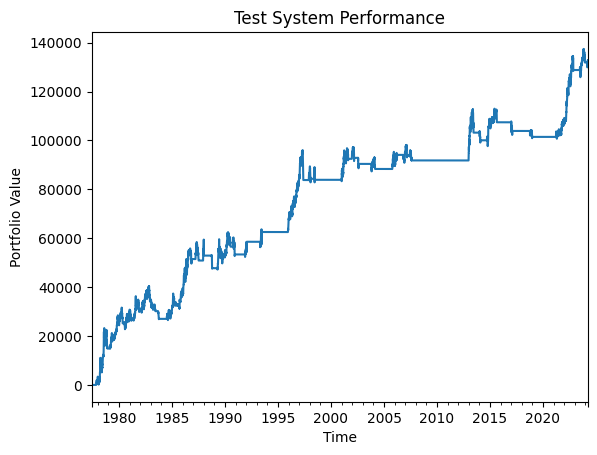

In [5]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the equity curve
my_system.accounts.portfolio().curve().plot()
plt.title('Test System Performance')
plt.ylabel('Portfolio Value')
plt.xlabel('Time')
plt.show()

In [4]:
# Get account statistics for the chapter 15 system
my_system.accounts.portfolio().percent.stats()

2025-02-12 03:21:58 INFO base_system {'stage': 'accounts'} Calculating pandl for portfolio
2025-02-12 03:21:58 DEBUG base_system {'stage': 'positionSize', 'instrument_code': 'JPY'} Getting vol target
2025-02-12 03:21:58 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'JPY'} Calculating pandl for instrument for JPY
2025-02-12 03:21:58 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'JPY'} Calculating buffers for JPY
2025-02-12 03:21:58 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'JPY'} Calculating forecast method buffers for JPY
2025-02-12 03:21:58 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'JPY'} Calculating buffered positions
2025-02-12 03:21:58 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'JPY'} Calculating pandl for instrument for JPY
2025-02-12 03:21:58 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 'JPY'} Calculating daily prices for JPY


[[('min', '-4.475'),
  ('max', '4.588'),
  ('median', '0'),
  ('mean', '0.01087'),
  ('std', '0.3627'),
  ('skew', '-0.4196'),
  ('ann_mean', '2.783'),
  ('ann_std', '5.803'),
  ('sharpe', '0.4796'),
  ('sortino', '0.3757'),
  ('avg_drawdown', '-6.317'),
  ('time_in_drawdown', '0.963'),
  ('calmar', '0.1847'),
  ('avg_return_to_drawdown', '0.4406'),
  ('avg_loss', '-0.4339'),
  ('avg_gain', '0.4354'),
  ('gaintolossratio', '1.003'),
  ('profitfactor', '1.154'),
  ('hitrate', '0.5349'),
  ('t_stat', '3.312'),
  ('p_value', '0.0009301')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]